In [1]:
# Load .data/mot/test_results.csv as a dataframe

import pandas as pd
import os

mot = pd.read_csv('.data/mot/test_result.csv', sep='|')

# drop the test_id and vehicle_id columns
mot = mot.drop(['test_id'], axis=1)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25


## Pre-processing

In [2]:
# Drop any first_use and test_date before 1970, to avoid invalid ages due to the UNIX epoch
mot = mot[mot['first_use_date'] >= '1970-01-01']
mot = mot[mot['test_date'] >= '1970-01-01']

# Calculate an age column (in days) based on the test_date and first_use_date columns
mot['test_date'] = pd.to_datetime(mot['test_date'])
mot['first_use_date'] = pd.to_datetime(mot['first_use_date'])
mot['age'] = (mot['test_date'] - mot['first_use_date']).dt.days
mot['age_years'] = mot['age'] / 365.25

# Combine make and model into one column
mot['make_model'] = mot['make'] + ' ' + mot['model']  # Combine make and model into one column

# Let us focus on data where cylinder capacity is between 500 and 5000
mot = mot[(mot['cylinder_capacity'] >= 500) & (mot['cylinder_capacity'] <= 5000)]

# Drop any negative ages, as they are likely to be errors
mot = mot[mot['age'] >= 0]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,age,age_years,make_model
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,2390,6.543463,TOYOTA PRIUS +
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,5223,14.299795,TOYOTA PRIUS
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,4735,12.963723,TOYOTA PRIUS
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,5759,15.767283,TOYOTA PRIUS
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,5759,15.767283,TOYOTA PRIUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,8857,24.249144,HONDA BEAT
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,2677,7.329227,RENAULT MASTER
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,5092,13.941136,PEUGEOT 207
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,5302,14.516085,NISSAN MICRA


In [3]:
# Describe the dataframe, limiting to cylinder_capacity, test_mileage and make

mot[['cylinder_capacity', 'test_mileage', 'age']].describe().drop('count').style.background_gradient(cmap='Greens')

,cylinder_capacity,test_mileage,age
mean,1697.913108,76317.103424,3807.270125
std,545.823434,47942.615679,1984.281978
min,500.000000,1.000000,0.000000
25%,1339.000000,40473.000000,2247.000000
50%,1597.000000,68201.000000,3468.000000
75%,1995.000000,102698.000000,5064.000000
max,5000.000000,999999.000000,19711.000000


In [4]:
# What is the distribution of cylinder_capacity?
mot['cylinder_capacity'].value_counts().sort_index()

cylinder_capacity
500.0      1840
501.0        90
502.0        42
503.0        44
504.0         1
          ...  
4996.0       43
4997.0      550
4998.0       91
4999.0    13533
5000.0    15337
Name: count, Length: 3088, dtype: int64

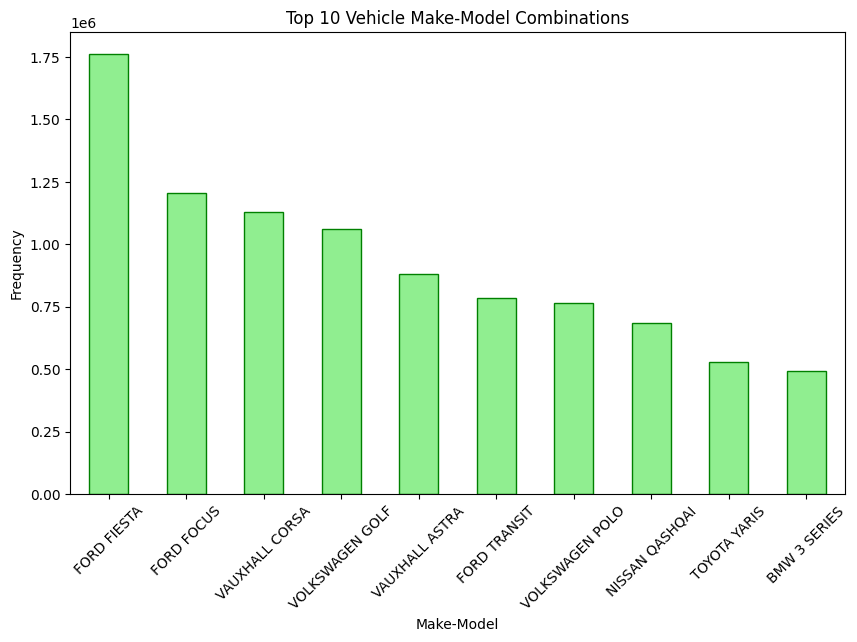

In [5]:
import matplotlib.pyplot as plt

# Calculate the top 10 most common make-model combinations
top_vehicles = mot['make_model'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_vehicles.plot(kind='bar', color='lightgreen', edgecolor='green')
plt.title('Top 10 Vehicle Make-Model Combinations')
plt.xlabel('Make-Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

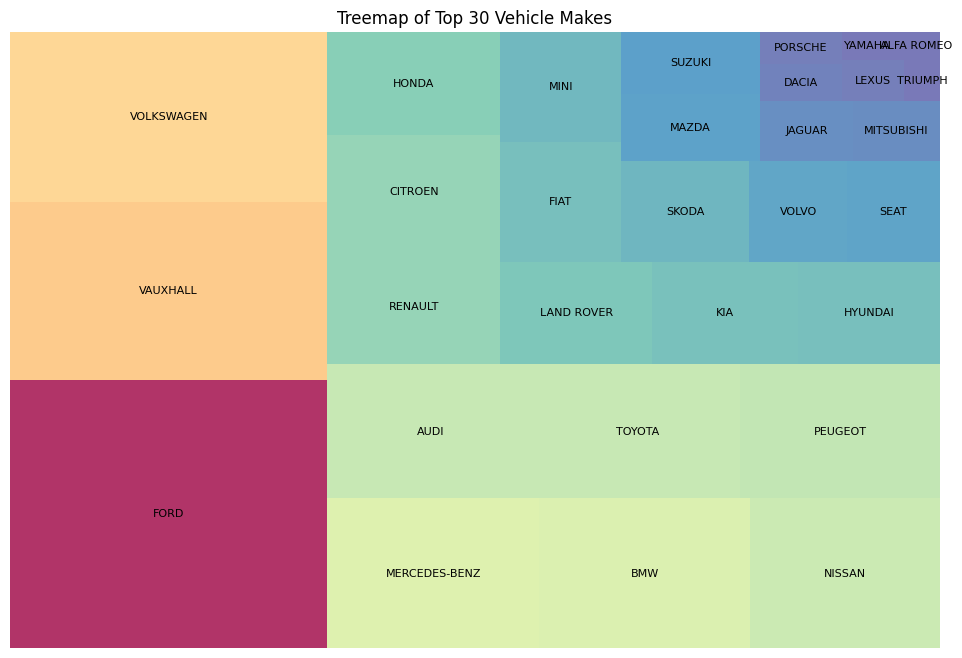

In [6]:
import squarify

# Calculate the top 30 most common makes
top_vehicles = mot['make'].value_counts().head(30)

labels = top_vehicles.index
sizes = top_vehicles.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Top 30 Vehicle Makes')
plt.axis('off')  # Remove axes
plt.show()

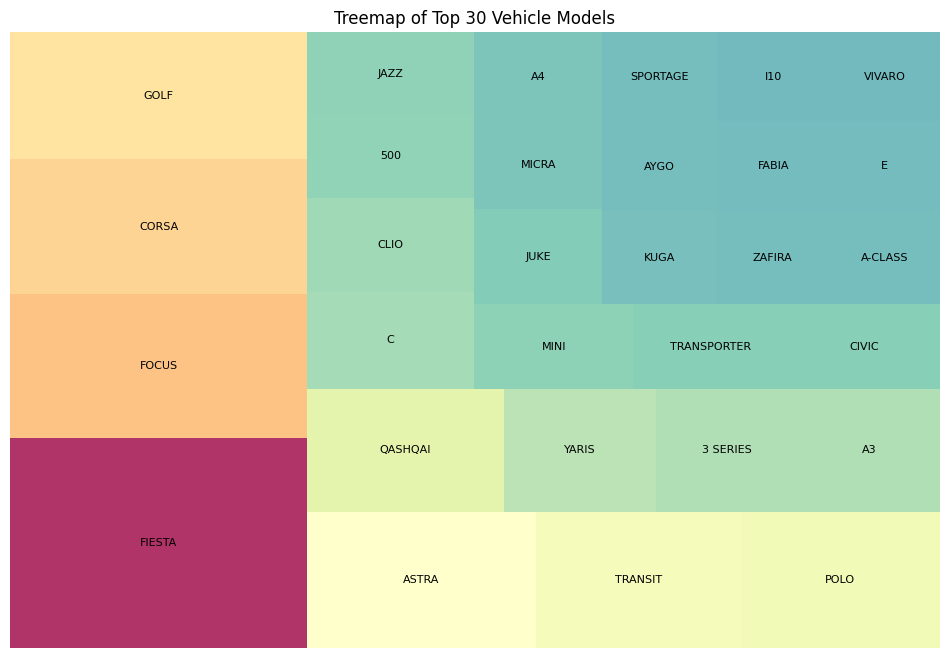

In [7]:
# Calculate the top 30 most common models
top_vehicles = mot['model'].value_counts().head(30)

labels = top_vehicles.index
sizes = top_vehicles.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Top 30 Vehicle Models')
plt.axis('off')  # Remove axes
plt.show()

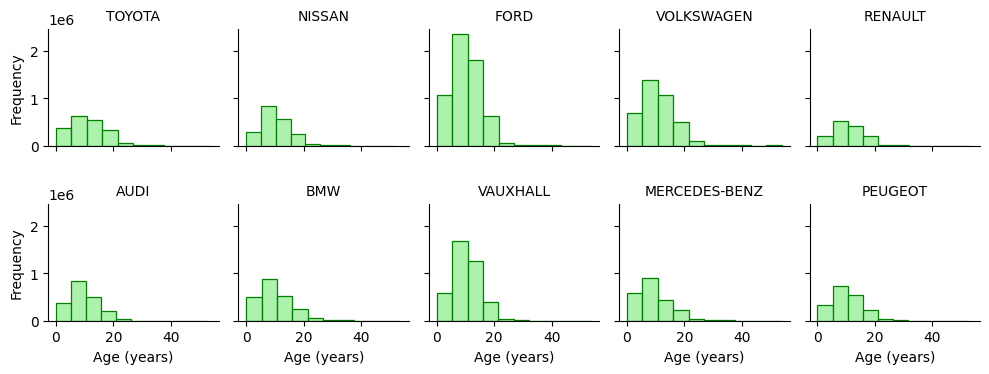

In [8]:
import seaborn as sns

# Filter for the top 10 makes
top_vehicles = mot['make'].value_counts().head(10)

# Plot a matrix of histograms per make of the age of vehicles in years
fct = sns.FacetGrid(mot[mot['make'].isin(top_vehicles.index)], col='make', col_wrap=5, height=2)
fct.map(sns.histplot, 'age_years', bins=10, color='lightgreen', edgecolor='green')
fct.set_titles('{col_name}')
fct.set_axis_labels('Age (years)', 'Frequency')
plt.show()


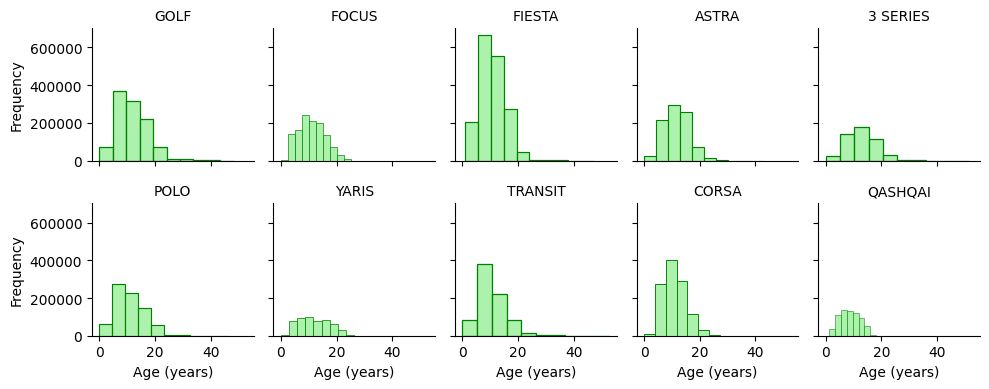

In [9]:
# Filter for the top 10 models
top_vehicles = mot['model'].value_counts().head(10)

# Plot a matrix of histograms per make of the age of vehicles in years
fct = sns.FacetGrid(mot[mot['model'].isin(top_vehicles.index)], col='model', col_wrap=5, height=2)
fct.map(sns.histplot, 'age_years', bins=10, color='lightgreen', edgecolor='green')
fct.set_titles('{col_name}')
fct.set_axis_labels('Age (years)', 'Frequency')
plt.show()

In [10]:
import plotly.express as px

# Calculate the average test mileage
avg_mileage = mot.groupby(['make_model', 'make'])['test_mileage'].mean().reset_index()

# Calculate the average age in years for each make_model as a proxy for size
avg_age_years = mot.groupby(['make_model', 'make'])['age_years'].mean().reset_index()

# Merge the average mileage data with the average age years
merged_data = avg_mileage.merge(avg_age_years, on=['make_model', 'make'])

# Sort the data by average mileage and select the top 20 for visualization
top_avg_mileage = merged_data.sort_values(by='test_mileage', ascending=False).head(20)

# Create a bubble chart
fig = px.scatter(
    top_avg_mileage,
    x='make_model',
    y='test_mileage',
    size='age_years',  # Use average age in years for bubble size
    color='make',  # Color by the extracted 'make'
    hover_name='make_model', 
    size_max=60, 
    title='Top 20 Average Test Mileage by Make-Model with Average Age',
    labels={'test_mileage': 'Average Test Mileage', 'age_years': 'Average Age (Years)', 'make': 'Make', 'make_model': 'Make-Model'}
)

# Customize the layout for plain white background and no grid lines
fig.update_layout(
    plot_bgcolor='white', # Set background to white
    xaxis=dict(
        showline=False, # Remove x-axis line
        showgrid=False, # Remove x-axis grid lines
        showticklabels=True,
    ),
    yaxis=dict(
        showline=False, # Remove y-axis line
        showgrid=False, # Remove y-axis grid lines
        title='Average Test Mileage'
    ),
    paper_bgcolor='white', # Ensure that the entire background is white
)

# Show the figure
fig.show()


In [11]:
# Find the makes with the highest ratio of test_result = P, limit to makes with at least 1000K tests
make_counts = mot['make'].value_counts()
make_p_counts = mot[mot['test_result'] == 'P']['make'].value_counts()
make_p_ratio = make_p_counts / make_counts
make_p_ratio = make_p_ratio[make_counts > 1000000].sort_values(ascending=False)

# Plot with Plotly
fig = px.bar(
    make_p_ratio,
    x=make_p_ratio.index,
    y=make_p_ratio.values,
    color=make_p_ratio.values,
    color_continuous_scale='Paired',
    labels={'x': 'Make', 'y': 'Test Result P Ratio', 'color': 'Test Result P Ratio'},
    title='Makes with the Highest Ratio of Test Result P (Pass) with at least 1000K Tests'
)

# Customize the layout for plain white background and no grid lines
fig.update_layout(
    plot_bgcolor='white', # Set background to white
    xaxis=dict(
        showline=False, # Remove x-axis line
        showgrid=False, # Remove x-axis grid lines
        showticklabels=True,
    ),
    yaxis=dict(
        showline=False, # Remove y-axis line
        showgrid=False, # Remove y-axis grid lines
        title='Test Result P Ratio'
    ),
    paper_bgcolor='white', # Ensure that the entire background is white
)

# Show the figure
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of make_figure
        Received value: 'Paired'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


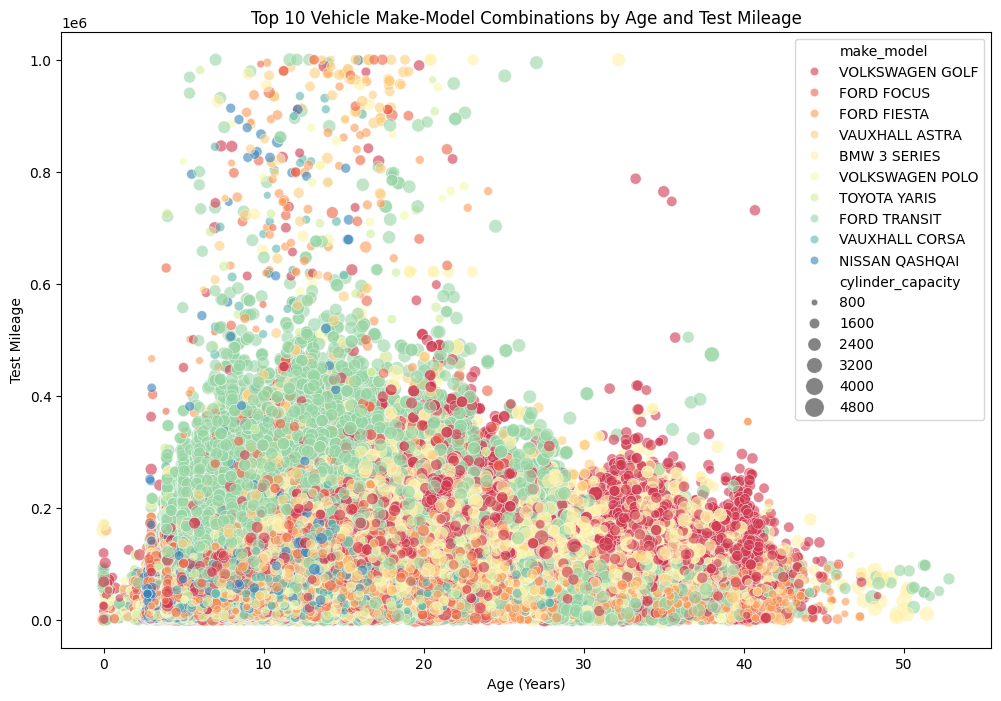

In [ ]:
# Scatter plot the most popular make_model combinations by age_years and test_mileage
top_vehicles = mot['make_model'].value_counts().head(10).index

# Filter the data for the top 10 make_model combinations
top_data = mot[mot['make_model'].isin(top_vehicles)]

# Create the scatter plot with Seaborn, include hue for make_model and cilinder_capacity as size
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_data, x='age_years', y='test_mileage', hue='make_model', size='cylinder_capacity', sizes=(20, 200), palette='Paired', alpha=0.6)
plt.title('Top 10 Vehicle Make-Model Combinations by Age and Test Mileage')
plt.xlabel('Age (Years)')
plt.ylabel('Test Mileage')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Create a copy of the DataFrame for manipulation which includes 10% of the data
mot_encoded = mot.sample(frac=0.3, random_state=42)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['make', 'model', 'fuel_type']  # Categorical columns to encode
for col in categorical_columns:
    mot_encoded[col] = le.fit_transform(mot_encoded[col])

# Features and Target
X = mot_encoded[['test_mileage', 'cylinder_capacity', 'age_years', 'make', 'model', 'fuel_type']]  # Feature selection
y = mot_encoded['test_result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Calculate feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importances


Accuracy: 0.6940227703984819
              precision    recall  f1-score   support

         ABA       0.10      0.07      0.08      1480
         ABR       0.73      0.70      0.72     13061
       ABRVE       0.00      0.00      0.00         4
           F       0.15      0.08      0.11    468959
           P       0.76      0.89      0.82   1885550
         PRS       0.07      0.01      0.02    118386

    accuracy                           0.69   2487440
   macro avg       0.30      0.29      0.29   2487440
weighted avg       0.61      0.69      0.65   2487440



,feature,importance
0,test_mileage,0.502973
1,age_years,0.419875
2,model,0.035967
3,cylinder_capacity,0.024814
4,make,0.013475
5,fuel_type,0.002895


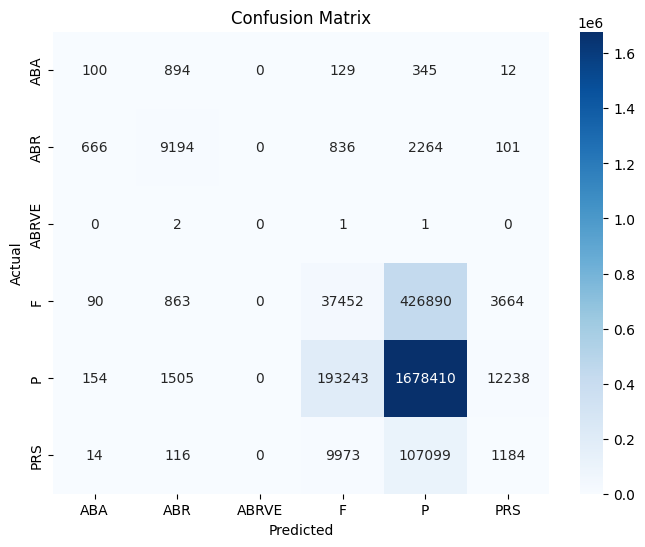

In [20]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()